In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\jagat\Downloads\Medical cost forecasting ds project\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#DATA PROCESSING 
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()
#no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

sex
male      676
female    662
Name: count, dtype: int64 
 smoker
no     1064
yes     274
Name: count, dtype: int64 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [9]:
# Step 1: Clean and map categorical variables
# Ensure 'sex', 'smoker', and 'region' columns are strings before cleaning
df['sex'] = df['sex'].astype(str).str.strip().str.lower()
df['smoker'] = df['smoker'].astype(str).str.strip().str.lower()
df['region'] = df['region'].astype(str).str.strip().str.lower()

# Map the categorical variables to numerical values
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3})

# Confirm mapping worked correctly by checking unique values
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())


[0 1]
[1 0]
[3 2 1 0]


In [10]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [11]:
#Exploratory Data Analysis



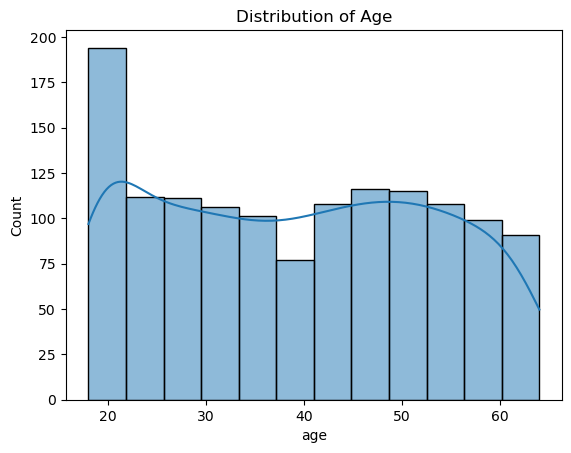

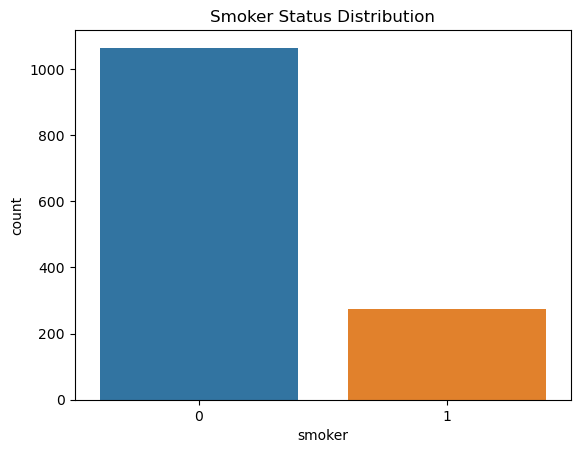

In [12]:
# Histogram for Age
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

# Bar plot for Smoker
sns.countplot(x='smoker', data=df)
plt.title('Smoker Status Distribution')
plt.show()


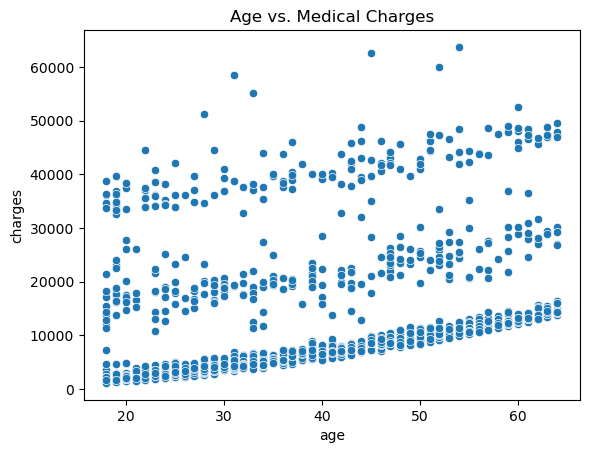

In [13]:
# Scatter plot for Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Medical Charges')
plt.show()

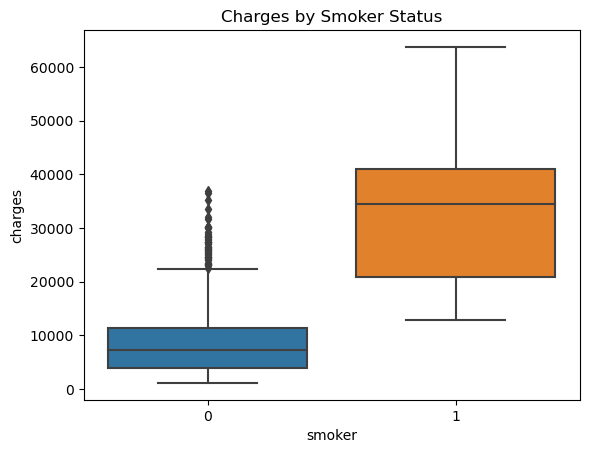

In [14]:
# Box plot for Smoker vs. Charges
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

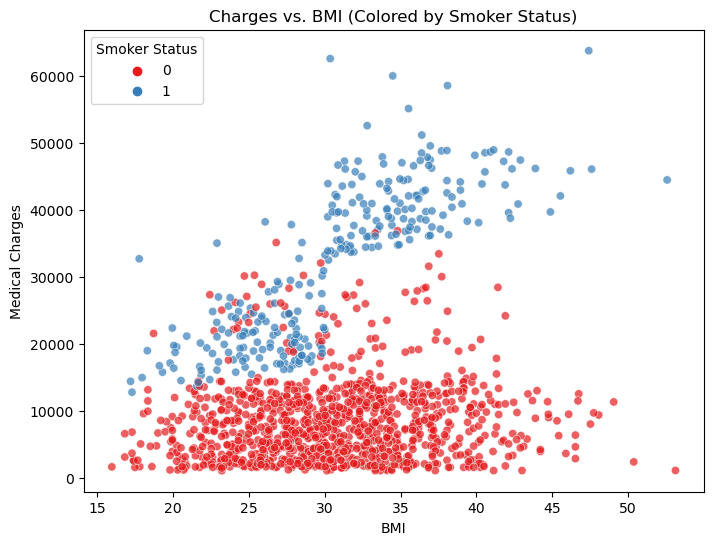

In [15]:
#scatter plot for bmi(Body Mass Index) vs charges
#Underweight: BMI < 18.5  -- Normal weight: BMI 18.5–24.9   --Overweight: BMI 25–29.9    --Obesity: BMI 30 and above
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='Set1', alpha=0.7)
plt.title("Charges vs. BMI (Colored by Smoker Status)")
plt.xlabel("BMI")
plt.ylabel("Medical Charges")
plt.legend(title="Smoker Status")
plt.show()

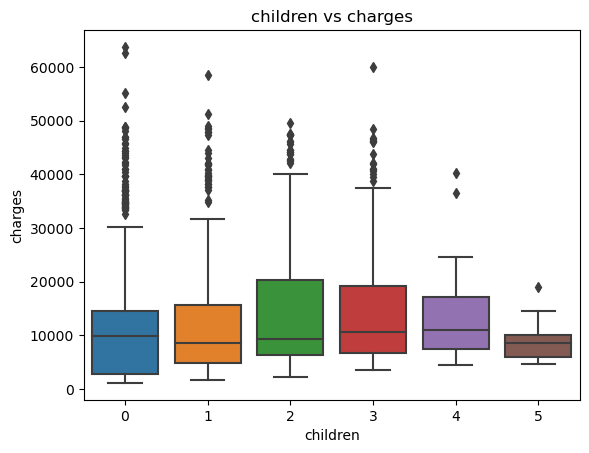

In [16]:
#childer vs charges
sns.boxplot(x='children',y='charges',data=df)
plt.title("children vs charges")
plt.show()

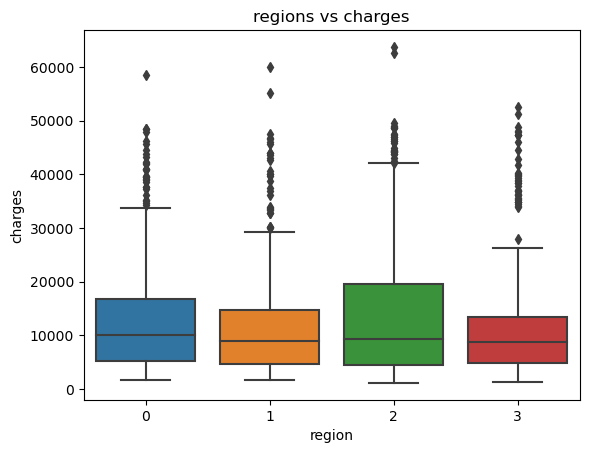

In [17]:
#regions vs charges
sns.boxplot(x='region',y='charges',data=df)
plt.title('regions vs charges')
plt.show()

In [18]:
#

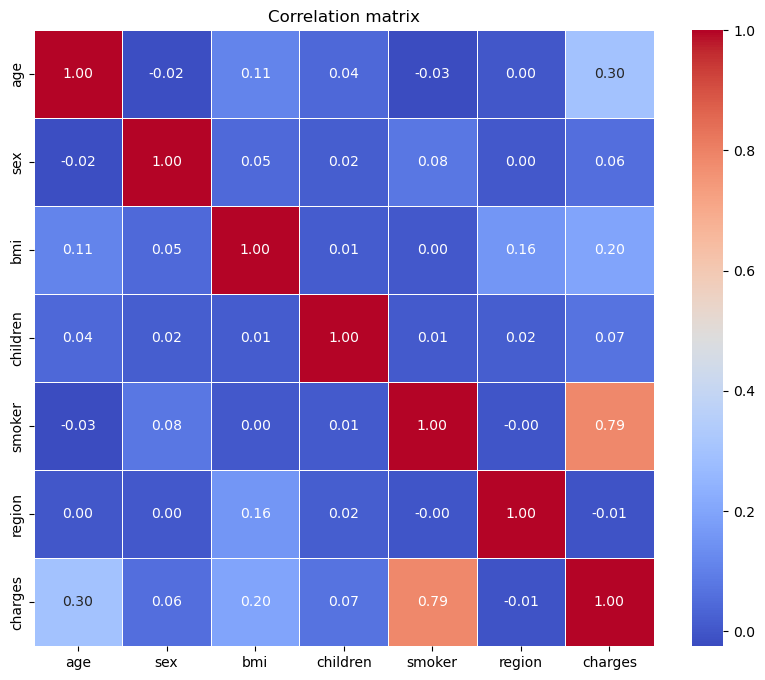

In [19]:
#CORRELATION ANALYSIS
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm'
           ,fmt = ".2f", linewidth=0.5)
plt.title('Correlation matrix')
plt.show()
#A correlation coefficient closer to 1 or -1 indicates a strong positive
#or negative relationship, respectively.
#Values close to 0 indicate weak or no correlation.
#positive corr - heat colors
#negative corr - cool colors

In [20]:
#

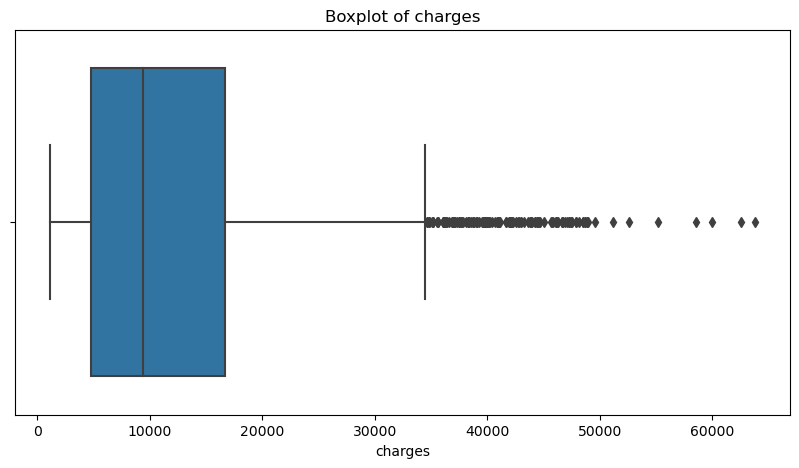

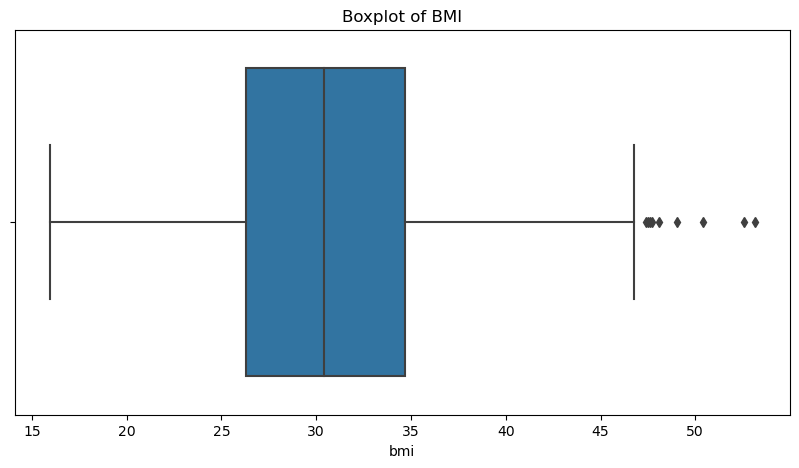

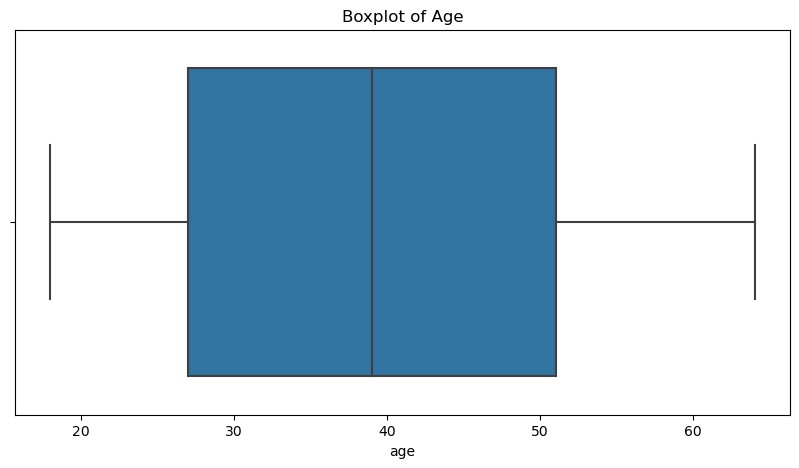

In [21]:
#identifying outliers using Box plotds, Z-score, IQR

#Boxpots
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',data=df)
plt.title('Boxplot of charges')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='bmi',data=df)
plt.title('Boxplot of BMI')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='age',data=df)
plt.title('Boxplot of Age')
plt.show()


C:\Users\jagat\AppData\Local\Temp\ipykernel_4112\887406048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.bmi < 30)]['charges'])


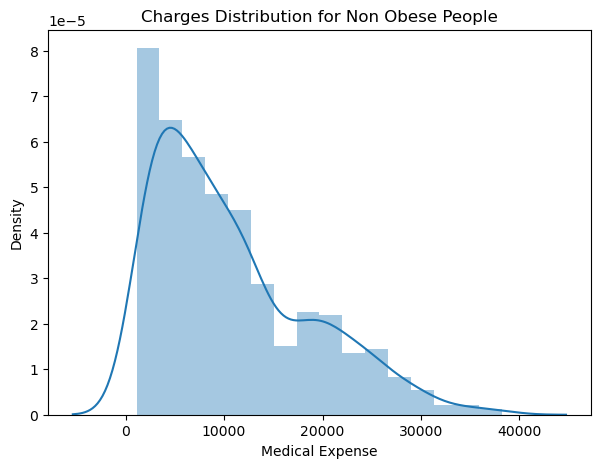

In [22]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

In [23]:
#using Z-Score method
from scipy import stats
def outlier_detection(data,column,threshold=3):
    data[f'{column}_z'] = np.abs(stats.zscore(data[column]))
    outlier = data[data[f'{column}_z']> threshold]
    return outlier

outlier_charges = outlier_detection(df,'charges')
outlier_bmi = outlier_detection(df,'bmi')
outlier_age = outlier_detection(df,'age')

print("Outliers in 'charges' based on Z-score:")
print(outlier_charges[['charges', 'charges_z']])

print("Outliers in 'BMI' based on Z-score:")
print(outlier_bmi[['bmi', 'bmi_z']])

print("Outliers in 'age' based on Z-score:")
print(outlier_age[['age', 'age_z']])

#Outliers are above 3 or below -3

Outliers in 'charges' based on Z-score:
          charges  charges_z
34    51194.55914   3.132806
543   63770.42801   4.171663
577   58571.07448   3.742159
819   55135.40209   3.458348
1146  52590.82939   3.248148
1230  60021.39897   3.861966
1300  62592.87309   4.074389
Outliers in 'BMI' based on Z-score:
        bmi     bmi_z
116   49.06  3.017861
847   50.38  3.234400
1047  52.58  3.595298
1317  53.13  3.685522
Outliers in 'age' based on Z-score:
Empty DataFrame
Columns: [age, age_z]
Index: []


In [24]:
#IQR method for outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detecting outliers in 'charges', 'BMI', and 'age' using IQR
outliers_charges_iqr = detect_outliers_iqr(df, 'charges')
outliers_bmi_iqr = detect_outliers_iqr(df, 'bmi')
outliers_age_iqr = detect_outliers_iqr(df, 'age')

print("\nOutliers in 'charges' based on IQR:")
print(outliers_charges_iqr[['charges']])

print("\nOutliers in 'BMI' based on IQR:")
print(outliers_bmi_iqr[['bmi']])



Outliers in 'charges' based on IQR:
          charges
14    39611.75770
19    36837.46700
23    37701.87680
29    38711.00000
30    35585.57600
...           ...
1300  62592.87309
1301  46718.16325
1303  37829.72420
1313  36397.57600
1323  43896.37630

[139 rows x 1 columns]

Outliers in 'BMI' based on IQR:
        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13


In [25]:
#limiting the outliers
def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    # Calculate lower and upper bounds
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    
    # Cap the outliers
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    
    return df

# Apply capping to 'charges' column
df = cap_outliers(df, 'charges')

# Check the capped DataFrame
print(df)

      age  sex     bmi  children  smoker  region      charges  charges_z  \
0      19    0  27.900         0       1       3  16884.92400   0.298584   
1      18    1  33.770         1       0       2   1725.55230   0.953689   
2      28    1  33.000         3       0       2   4449.46200   0.728675   
3      33    1  22.705         0       0       1  21984.47061   0.719843   
4      32    1  28.880         0       0       1   3866.85520   0.776802   
...   ...  ...     ...       ...     ...     ...          ...        ...   
1333   50    1  30.970         3       0       1  10600.54830   0.220551   
1334   18    0  31.920         0       0       0   2205.98080   0.914002   
1335   18    0  36.850         0       0       2   1629.83350   0.961596   
1336   21    0  25.800         0       0       3   2007.94500   0.930362   
1337   61    0  29.070         0       1       1  29141.36030   1.311053   

         bmi_z     age_z  
0     0.453320  1.438764  
1     0.509621  1.509965  
2     

In [26]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# Assume 'data' is preprocessed
X = df.drop(columns=['charges'])  # Features
y = df['charges']  # Target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Polynomial Features (Optional)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [27]:
#MODEL SELECTION - GRADIENT BOOSTING

In [28]:
#XGBOOST IMPLEMENTATION
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
import xgboost as xgb

#Split data to training and testing
X=df.drop('charges',axis=1) # features
y=df['charges'] #target

#split into 80% train, 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

#train the model
model = xgb.XGBRegressor(objective='reg:squarederror',n_estimators=1000,
                        learning_rate=0.05)
model.fit(X_train,y_train)

#predict the test data
y_pred = model.predict(X_test)

#compute RMSE - Measures the average magnitude of errors.
rmse = mean_squared_error(y_test, y_pred, squared=False)
#compute R-squared - proportion of the variance in the target variable that is 
#predictable from the features.
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE) : 2339.870051312174
R-squared: 0.9635494956674938


In [29]:
#

In [30]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing - Handling outliers
scaler = RobustScaler()

# Fit the scaler to the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter distribution (example with fewer values)
param_dist = {
    'learning_rate': uniform(0.01, 0.2),  # Uniform distribution for learning rate
    'n_estimators': randint(100, 1000),   # Random integer values for number of estimators
    'max_depth': randint(3, 10),           # Max depth from 3 to 10
    'subsample': uniform(0.7, 0.3),        # Random float for subsample
    'colsample_bytree': uniform(0.7, 0.3), # Random float for colsample_bytree
    'gamma': uniform(0, 0.5),              # Gamma value
    'min_child_weight': randint(1, 10)     # Random integer for min_child_weight
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize RandomizedSearchCV (use fewer iterations for faster results)
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Best parameters from RandomizedSearchCV
print(f"Best Parameters: {random_search.best_params_}")

best_model_random = random_search.best_estimator_
y_pred_random = best_model_random.predict(X_test_scaled)

rmse_random = mean_squared_error(y_test, y_pred_random, squared=False)
r2_random = r2_score(y_test, y_pred_random)

print(f"Random Search Best Model RMSE: {rmse_random}")
print(f"Random Search Best Model R-squared: {r2_random}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.9115253092889979, 'gamma': 0.12436207721514397, 'learning_rate': 0.0760505058038197, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 272, 'subsample': 0.7034060934302256}
Random Search Best Model RMSE: 2249.326945124839
Random Search Best Model R-squared: 0.9663158776929719


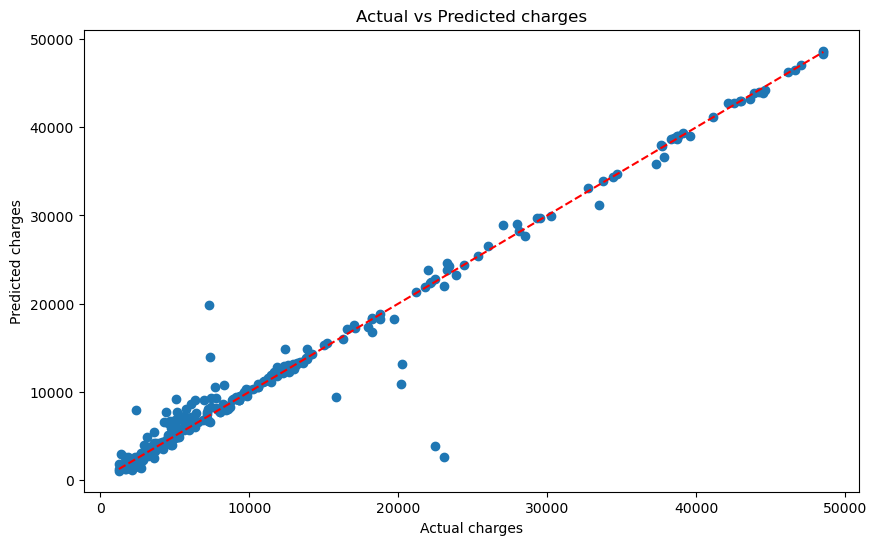

In [31]:
#plotting predictions vs actual values
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_random)
plt.plot([min(y_test),max(y_test)] , [min(y_test),max(y_test)], color='red',
         linestyle='--')
plt.title('Actual vs Predicted charges')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.show()

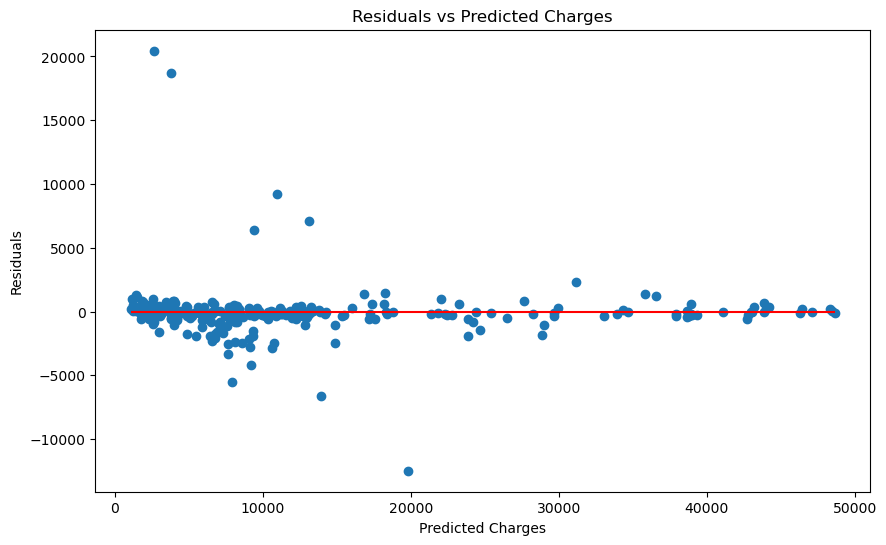

In [32]:
#errors between predictions and true values
residuals = y_test - y_pred_random
plt.figure(figsize=(10,6))
plt.scatter(y_pred_random, residuals)
plt.hlines(y=0, xmin=min(y_pred_random), xmax=max(y_pred_random), colors='r')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Charges')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Assume you have already trained the model and predicted y_pred as shown before

# Discretize the target and predicted values based on a threshold for high vs low charges
threshold = 20000  # This can be adjusted based on your domain knowledge

# Convert actual charges and predicted charges to binary values (high vs low charges)
y_test_bin = (y_test > threshold).astype(int)  # Actual labels as binary (0: low, 1: high)
y_pred_bin = (y_pred > threshold).astype(int)  # Predicted labels as binary (0: low, 1: high)

# Now calculate classification metrics based on the binary labels
accuracy = accuracy_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)

# Displaying the metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# Additionally, RMSE and R-squared values (as already calculated during RandomizedSearchCV)
print(f"RMSE: {2249.33}")  # Use the RMSE from your Random Search Best Model
print(f"R-squared: {0.9663}")  # Use the R-squared value from your Random Search Best Model


Accuracy: 0.9850746268656716
Recall: 0.9298245614035088
Precision: 1.0
F1 Score: 0.9636363636363636
RMSE: 2249.33
R-squared: 0.9663


C:\Users\jagat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Threshold for Maximum Recall: 10000.0


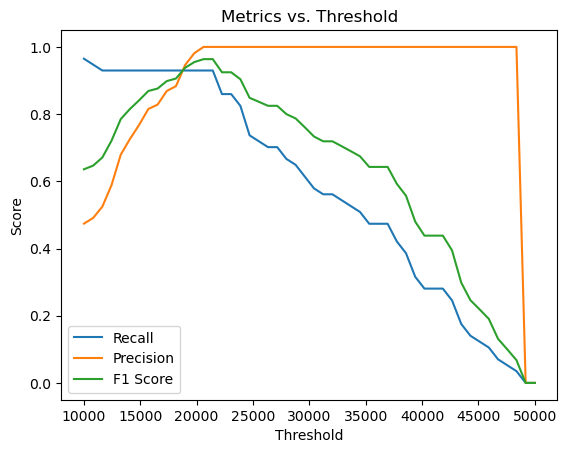

In [34]:
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

# Define a range of thresholds
thresholds = np.linspace(10000, 50000, 50)  # Adjust the range as needed

# Store metrics for different thresholds
recalls = []
precisions = []
f1_scores = []

# Loop through thresholds
for threshold in thresholds:
    # Discretize the target and predicted values based on the threshold
    y_pred_bin = (y_pred > threshold).astype(int)  # Predicted labels as binary (0: low, 1: high)
    
    # Calculate metrics
    recall = recall_score(y_test_bin, y_pred_bin)
    precision = precision_score(y_test_bin, y_pred_bin)
    f1 = f1_score(y_test_bin, y_pred_bin)
    
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

# Find the threshold that gives the best recall
best_threshold = thresholds[np.argmax(recalls)]
print(f"Best Threshold for Maximum Recall: {best_threshold}")

# Optionally, you can plot the recall, precision, and F1 score for each threshold
import matplotlib.pyplot as plt

plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Metrics vs. Threshold')
plt.show()


In [35]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, r2_score

# Assuming `model` is your trained model, `X_test` is the test features, and `y_test` is the actual labels
# Make predictions
y_pred_continuous = model.predict(X_test)  # Continuous predictions for regression

# For classification, set a threshold to classify high vs low charges
threshold = 20000  # Adjust based on your analysis
y_pred_class = (y_pred_continuous > threshold).astype(int)  # Binary predictions

# Evaluation metrics for classification
accuracy = accuracy_score(y_test_bin, y_pred_class)
recall = recall_score(y_test_bin, y_pred_class)
precision = precision_score(y_test_bin, y_pred_class)
f1 = f1_score(y_test_bin, y_pred_class)

# Evaluation metrics for regression
rmse = np.sqrt(mean_squared_error(y_test, y_pred_continuous))
r2 = r2_score(y_test, y_pred_continuous)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

# Example: Predict for a new data point
new_data = np.array([[25, 30.5, 0, 1, 0, 1, 0, 0, 1]])  # 9 features
new_data_scaled = scaler.transform(new_data)
new_prediction_continuous = model.predict(new_data_scaled)
new_prediction_class = (new_prediction_continuous > threshold).astype(int)

print(f"Predicted Charge: {new_prediction_continuous[0]}")
print(f"Predicted Class: {'High' if new_prediction_class[0] == 1 else 'Low'}")


Accuracy: 0.9850746268656716
Recall: 0.9298245614035088
Precision: 1.0
F1 Score: 0.9636363636363636
RMSE: 2339.870051312174
R-squared: 0.9635494956674938
Predicted Charge: 19925.896484375
Predicted Class: Low


C:\Users\jagat\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [36]:
import joblib
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor  # Replace with your actual model

# Assuming your model and scaler are already trained:
# model = XGBRegressor()  # or your trained model
# scaler = StandardScaler()  # or your trained scaler

# Saving model and scaler to .pkl files
joblib.dump(model, r"C:\Users\jagat\Downloads\Medical cost forecasting ds project\model.pkl")
joblib.dump(scaler, r"C:\Users\jagat\Downloads\Medical cost forecasting ds project\scaler.pkl")


['C:\\Users\\jagat\\Downloads\\Medical cost forecasting ds project\\scaler.pkl']

In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model
model = joblib.load(r"C:\Users\jagat\Downloads\Medical cost forecasting ds project\model.pkl")

# Example input data (with the correct number of features)
# Note: Ensure that this includes all features that were part of the training set.
new_data = np.array([[25, 30.5, 0, 1, 0, 1, 1, 0, 1]])  # Example with 9 features

# Ensure correct feature encoding (Region, Sex, etc.)
# For example, if you used one-hot encoding for "Region", make sure it’s consistent

# If needed, scale the features just like during training
scaler = StandardScaler()  # Assuming you used StandardScaler during training
new_data_scaled = scaler.fit_transform(new_data)  # Scaling the input data

# Step 3: Make a prediction
predicted_charge = model.predict(new_data_scaled)

# Output the result
print(f"Predicted Medical Charges: {predicted_charge[0]}")


Predicted Medical Charges: 20268.349609375
